In [68]:
from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [69]:
#api_key = 'UQ19NZBEHHCEHIOR'

api_key = 'UQ19NZBEHHCEHIOR'

    # Let's try APPLE stock market prices
ticker = "AAPL"

    # JSON file with all the stock market data for AAL from the last 20 years
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

    # Save data to this file
file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)

    # If the data is already there, just load it from the CSV
else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save)

File already exists. Loading data from CSV


In [70]:
df['Date'] = pd.to_datetime(df["Date"])
df_indx = df.set_index(["Date"], drop=True)
df_indx.head(5)

,Unnamed: 0,Low,High,Close,Open
Date,,,,,
2019-01-11,5290,151.51,153.70,152.29,152.88
2019-01-10,5289,150.86,153.97,153.80,152.50
2019-01-09,5288,149.63,154.53,153.31,151.29
2019-01-08,5287,148.52,151.82,150.75,149.56
2019-01-07,5286,145.90,148.83,147.93,148.70


In [71]:
df_indx = df_indx.sort_index(axis=1, ascending=True)
df_indx = df_indx.iloc[::-1]
df_indx.head(5)

,Close,High,Low,Open,Unnamed: 0
Date,,,,,
1998-01-02,16.25,16.25,13.50,13.63,0
1998-01-05,15.88,16.56,15.19,16.50,1
1998-01-06,18.94,20.00,14.75,15.94,2
1998-01-07,17.50,19.00,17.31,18.81,3
1998-01-08,18.19,18.62,16.94,17.44,4


In [72]:
# First calculate the mid prices from the highest and lowest
mid_prices = (df_indx['Low']+df_indx['High'])/2
df_indx['mid_prices'] = mid_prices
df_indx.head()

,Close,High,Low,Open,Unnamed: 0,mid_prices
Date,,,,,,
1998-01-02,16.25,16.25,13.50,13.63,0,14.875
1998-01-05,15.88,16.56,15.19,16.50,1,15.875
1998-01-06,18.94,20.00,14.75,15.94,2,17.375
1998-01-07,17.50,19.00,17.31,18.81,3,18.155
1998-01-08,18.19,18.62,16.94,17.44,4,17.780


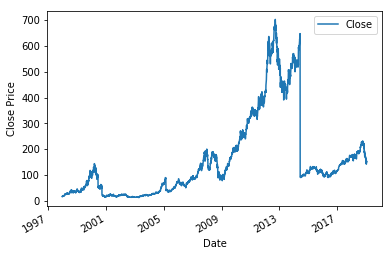

In [73]:
data = df_indx[['Close']]
data.plot(y='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [74]:
display(data.describe())

,Close
count,5291.000000
mean,158.329835
std,160.650104
min,13.120000
25%,38.160000
50%,106.960000
75%,186.930000
max,702.100000


In [76]:
diff = data.index.values[5290] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("90 percent data = 1998 to %d"%(1998 + int(0.9*years)))

Total data: 21 years
90 percent data = 1998 to 2016


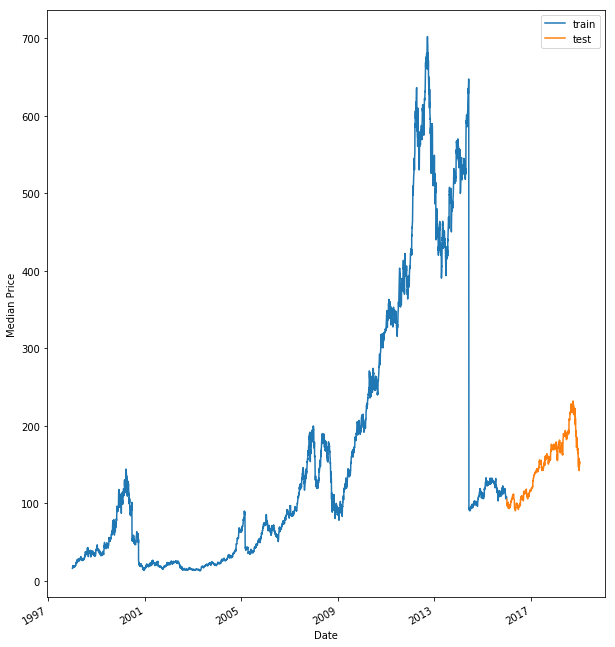

In [77]:
split_date = pd.Timestamp('01-01-2016')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.show()

Normalizing the Data

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [79]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

D:\Work\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Work\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
D:\Work\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Work\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [80]:
#counting the training data and testing dat
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (4528 x 1)
Test size: (761 x 1)


Benchmark Model

In [85]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()

In [86]:
linearregression.fit(X_train, y_train)
y_pred = linearregression.predict(X_test)

No handles with labels found to put in legend.


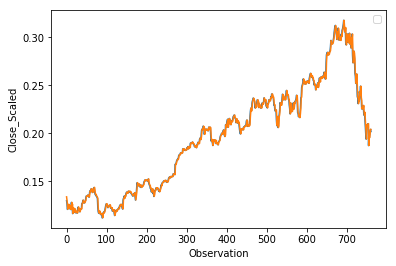

In [87]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel('Observation')
plt.ylabel('Close_Scaled')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(y_pred, y_test)
print("rms error is: " + str(rmse_val))

R-squared is: 0.995844
rms error is: 0.003511320614042044


Neural Network - ANN model

In [288]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [289]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [290]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

In [291]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [292]:
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
4528/4528 [==============================] - 4s 820us/step - loss: 6.7520e-04
Epoch 2/200
4528/4528 [==============================] - 4s 789us/step - loss: 4.4573e-04
Epoch 3/200
4528/4528 [==============================] - 4s 806us/step - loss: 3.3961e-04
Epoch 4/200
4528/4528 [==============================] - 4s 832us/step - loss: 2.9057e-04
Epoch 5/200
4528/4528 [==============================] - 4s 835us/step - loss: 2.6522e-04
Epoch 6/200
4528/4528 [==============================] - 4s 859us/step - loss: 2.5048e-04
Epoch 7/200
4528/4528 [==============================] - 4s 853us/step - loss: 2.4194e-04
Epoch 8/200
4528/4528 [==============================] - 4s 867us/step - loss: 2.3661e-04
Epoch 9/200
4528/4528 [==============================] - 4s 884us/step - loss: 2.3322e-04
Epoch 10/200
4528/4528 [==============================] - 4s 886us/step - loss: 2.3102e-04
Epoch 11/200
4528/4528 [==============================] - 4s 907us/step - loss: 2.2955e-04
Epoch 12

4528/4528 [==============================] - 4s 983us/step - loss: 2.2352e-04
Epoch 93/200
4528/4528 [==============================] - 4s 979us/step - loss: 2.2349e-04
Epoch 94/200
4528/4528 [==============================] - 4s 981us/step - loss: 2.2346e-04
Epoch 95/200
4528/4528 [==============================] - 4s 992us/step - loss: 2.2343e-04
Epoch 96/200
4528/4528 [==============================] - 4s 991us/step - loss: 2.2340e-04
Epoch 97/200
4528/4528 [==============================] - 4s 984us/step - loss: 2.2338e-04
Epoch 98/200
4528/4528 [==============================] - 4s 991us/step - loss: 2.2335e-04
Epoch 99/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2332e-04
Epoch 100/200
4528/4528 [==============================] - 5s 994us/step - loss: 2.2329e-04
Epoch 101/200
4528/4528 [==============================] - 5s 995us/step - loss: 2.2327e-04
Epoch 102/200
4528/4528 [==============================] - 4s 992us/step - loss: 2.2324e-04
Epoch 103/2

Epoch 183/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2156e-04
Epoch 184/200
4528/4528 [==============================] - 5s 995us/step - loss: 2.2155e-04
Epoch 185/200
4528/4528 [==============================] - 4s 993us/step - loss: 2.2153e-04
Epoch 186/200
4528/4528 [==============================] - 4s 991us/step - loss: 2.2152e-04
Epoch 187/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2150e-04
Epoch 188/200
4528/4528 [==============================] - 4s 989us/step - loss: 2.2149e-04
Epoch 189/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2148e-04
Epoch 190/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2146e-04
Epoch 191/200
4528/4528 [==============================] - 6s 1ms/step - loss: 2.2145e-04
Epoch 192/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2143e-04
Epoch 193/200
4528/4528 [==============================] - 5s 1ms/step - loss: 2.2142e-04
Ep

In [293]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(y_pred_test_ann, y_test)
print("rms error is: " + str(rmse_val))

The R2 score on the Train set is:	0.942
The Adjusted R2 score on the Train set is:	0.942

The R2 score on the Test set is:	0.899
The Adjusted R2 score on the Test set is:	0.899
rms error is: 0.01733237827034811


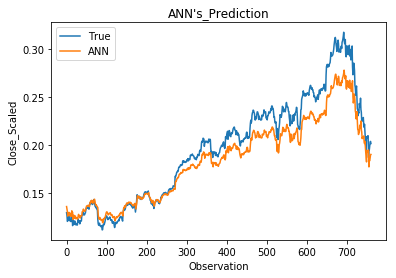

In [294]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ann, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('Close_Scaled')
plt.legend()
plt.show()

In [295]:
model.save('ANN_NonShift_aapl.h5')

LSTM Model

In [296]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [297]:
from keras.layers import LSTM, Dropout
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='ADAM')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

In [298]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [299]:
history = model_lstm.fit(X_tr_t, y_train, epochs=500, batch_size=50, validation_split=0.1, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 4075 samples, validate on 453 samples
Epoch 1/500
4075/4075 [==============================] - 1s 238us/step - loss: 0.0274 - val_loss: 0.0157
Epoch 2/500
4075/4075 [==============================] - 0s 49us/step - loss: 0.0172 - val_loss: 0.0102
Epoch 3/500
4075/4075 [==============================] - 0s 49us/step - loss: 0.0138 - val_loss: 0.0076
Epoch 4/500
4075/4075 [==============================] - 0s 46us/step - loss: 0.0110 - val_loss: 0.0057
Epoch 5/500
4075/4075 [==============================] - 0s 50us/step - loss: 0.0084 - val_loss: 0.0042
Epoch 6/500
4075/4075 [==============================] - 0s 54us/step - loss: 0.0061 - val_loss: 0.0030
Epoch 7/500
4075/4075 [==============================] - 0s 54us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 8/500
4075/4075 [==============================] - 0s 47us/step - loss: 0.0029 - val_loss: 0.0019
Epoch 9/500
4075/4075 [==============================] - 0s 37us/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/500
407

4075/4075 [==============================] - 0s 58us/step - loss: 5.8203e-05 - val_loss: 0.0015
Epoch 77/500
4075/4075 [==============================] - 0s 63us/step - loss: 5.6180e-05 - val_loss: 0.0015
Epoch 78/500
4075/4075 [==============================] - 0s 47us/step - loss: 5.4450e-05 - val_loss: 0.0015
Epoch 79/500
4075/4075 [==============================] - 0s 50us/step - loss: 5.2970e-05 - val_loss: 0.0015
Epoch 80/500
4075/4075 [==============================] - 0s 46us/step - loss: 5.1708e-05 - val_loss: 0.0015
Epoch 81/500
4075/4075 [==============================] - 0s 54us/step - loss: 5.0645e-05 - val_loss: 0.0015
Epoch 82/500
4075/4075 [==============================] - 0s 52us/step - loss: 4.9752e-05 - val_loss: 0.0015
Epoch 83/500
4075/4075 [==============================] - 0s 56us/step - loss: 4.8998e-05 - val_loss: 0.0015
Epoch 84/500
4075/4075 [==============================] - 0s 49us/step - loss: 4.8369e-05 - val_loss: 0.0015
Epoch 85/500
4075/4075 [========

In [300]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(y_pred_test_lstm, y_test)
print("rms error is: " + str(rmse_val))

The R2 score on the Train set is:	0.997
The Adjusted R2 score on the Train set is:	0.997

The R2 score on the Test set is:	0.995
The Adjusted R2 score on the Test set is:	0.995
rms error is: 0.0037043840225298268


In [301]:
model_lstm.save('LSTM_NonShift_aapl.h5')

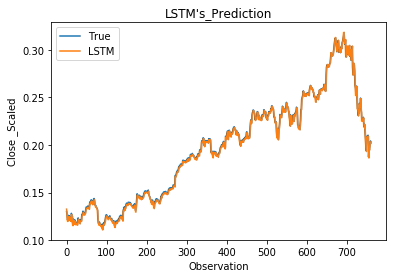

In [302]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('Close _Scaled')
plt.legend()
plt.show()

Lerning Curve

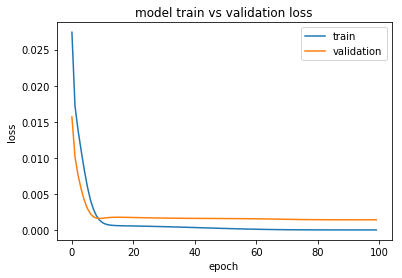

In [303]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()